In [304]:
%matplotlib inline
import pandas as pd
import numpy
import matplotlib.pyplot as plt

In [305]:
df_eventos = pd.read_csv("F:/Bibliotecas/Documentos/football-events/events.csv") #dt
df_dados_partida = pd.read_csv("F:/Bibliotecas/Documentos/football-events/ginf.csv") #dtt

In [306]:
df_eventos.columns

Index(['id_odsp', 'id_event', 'sort_order', 'time', 'text', 'event_type',
       'event_type2', 'side', 'event_team', 'opponent', 'player', 'player2',
       'player_in', 'player_out', 'shot_place', 'shot_outcome', 'is_goal',
       'location', 'bodypart', 'assist_method', 'situation', 'fast_break'],
      dtype='object')

In [391]:
evento_tentativa = 1 #Define o evento como tentativa de gol
na_meta = 1 
gol_true = 1         #Define o evento como gol
gol_false = 0        #Define que o evento não foi gol
penalti_concedido = 11  #Define que o 'event_type' foi penalti
alema = 'D1'
inglesa = 'E0'
espanhola = 'SP1'
italiana = 'I1'
francesa = 'F1'

In [308]:
##TRABALHANDO NOS VALORES DOS GOLS E TENTATIVAS

In [309]:
##Pegar colunas especificas do DataFrame, correspondente as finalizações
df_nova_eventos = df_eventos[['id_odsp', 'id_event', 'sort_order', 'text', 'event_type', 'event_type2','side', 'event_team',
                              'opponent','player', 'player2', 'shot_place', 'shot_outcome', 'is_goal', 'location', 'bodypart',
                              'assist_method', 'situation']] #dct

In [310]:
df_dados_partida = df_dados_partida[['id_odsp', 'link_odsp', 'adv_stats', 'date', 'league', 'season',
       'country', 'ht', 'at', 'fthg', 'ftag']]

# 1.	QUAL O PERCENTUAL DE ACERTOS NOS CHUTES DOS CLUBES?

## Reduzindo os dados do DataFrame para os desejados

### Guardando os valores de tentativas que foram gols

In [311]:
df_gols = df_nova_eventos[(df_nova_eventos['event_type'] == evento_tentativa) & (df_nova_eventos['is_goal'] == gol_true)
                          & (df_nova_eventos['shot_outcome'] >= na_meta)]

### Guardando os registros de tentativas que não foram gols

In [312]:
df_tentativas = df_nova_eventos[(df_nova_eventos['event_type'] == evento_tentativa) & 
                                (df_nova_eventos['is_goal'] == gol_false)]

In [313]:
df_gols.columns


Index(['id_odsp', 'id_event', 'sort_order', 'text', 'event_type',
       'event_type2', 'side', 'event_team', 'opponent', 'player', 'player2',
       'shot_place', 'shot_outcome', 'is_goal', 'location', 'bodypart',
       'assist_method', 'situation'],
      dtype='object')

In [314]:
##ACIMA A TENTATIVA DE RESPONDER A QUESTÃO 1 (EM ANDAMENTO)

In [315]:
##Construindo um DataFrame com os valores necessários da tabela Ginf
dados_partida = df_dados_partida.columns[:-9] ##Não funciona (DESSA FORMA SÓ COPIA OS INDEXS)

In [316]:
df_dados_partida.head()

,id_odsp,link_odsp,adv_stats,date,league,season,country,ht,at,fthg,ftag
0,UFot0hit/,/soccer/germany/bundesliga-2011-2012/dortmund-...,True,2011-08-05,D1,2012,germany,Borussia Dortmund,Hamburg SV,3,1
1,Aw5DflLH/,/soccer/germany/bundesliga-2011-2012/augsburg-...,True,2011-08-06,D1,2012,germany,FC Augsburg,SC Freiburg,2,2
2,bkjpaC6n/,/soccer/germany/bundesliga-2011-2012/werder-br...,True,2011-08-06,D1,2012,germany,Werder Bremen,Kaiserslautern,2,0
3,CzPV312a/,/soccer/france/ligue-1-2011-2012/paris-sg-lori...,True,2011-08-06,F1,2012,france,Paris Saint-Germain,Lorient,0,1
4,GUOdmtII/,/soccer/france/ligue-1-2011-2012/caen-valencie...,True,2011-08-06,F1,2012,france,Caen,Valenciennes,1,0


## Criando uma junção natural entre os dois dataframes

In [317]:
gols = pd.merge(df_gols, df_dados_partida, how='inner', on=['id_odsp', 'id_odsp'])

## Agrupando os dados por time e temporada

In [318]:
##Agrupando o quantitativo de gols de cada time por temporada
gols_temporada = gols.groupby(['event_team', 'season']).count()

gols_temp_geral = gols_temporada = gols.groupby(['event_team']).count()

### Exibindo os gols de cada time por temporada

In [319]:
gols_temporada.head()

,id_odsp,id_event,sort_order,text,event_type,event_type2,side,opponent,player,player2,...,link_odsp,adv_stats,date,league,season,country,ht,at,fthg,ftag
event_team,,,,,,,,,,,,,,,,,,,,,
AC Ajaccio,110,110,110,110,110,76,110,110,110,76,...,110,110,110,110,110,110,110,110,110,110
AC Milan,320,320,320,320,320,203,320,320,320,201,...,320,320,320,320,320,320,320,320,320,320
AJ Auxerre,46,46,46,46,46,29,46,46,46,29,...,46,46,46,46,46,46,46,46,46,46
AS Monaco,228,228,228,228,228,149,228,228,228,147,...,228,228,228,228,228,228,228,228,228,228
AS Nancy Lorraine,87,87,87,87,87,63,87,87,87,63,...,87,87,87,87,87,87,87,87,87,87


## Reazlizando uma junção dos dataframes

In [320]:
##Agrupando o quantitativo de gols de cada time por temporada
df_tentativas_temporada = pd.merge(df_tentativas, df_dados_partida, how='inner', on=['id_odsp', 'id_odsp'])

#### Separando 2 dataframes, um agrupado por clube e outro por clube e emporada

In [321]:
tentativas_temporada = df_tentativas_temporada.groupby(['event_team', 'season']).count()

tentativas_temp_geral = df_tentativas_temporada.groupby(['event_team']).count()

In [322]:
tentativas_temp_geral.head()

,id_odsp,id_event,sort_order,text,event_type,event_type2,side,opponent,player,player2,...,link_odsp,adv_stats,date,league,season,country,ht,at,fthg,ftag
event_team,,,,,,,,,,,,,,,,,,,,,
AC Ajaccio,992,992,992,992,992,686,992,992,992,686,...,992,992,992,992,992,992,992,992,992,992
AC Milan,2736,2736,2736,2736,2736,1999,2736,2736,2736,1999,...,2736,2736,2736,2736,2736,2736,2736,2736,2736,2736
AJ Auxerre,400,400,400,400,400,273,400,400,400,273,...,400,400,400,400,400,400,400,400,400,400
AS Monaco,1432,1432,1432,1432,1432,1072,1432,1432,1432,1072,...,1432,1432,1432,1432,1432,1432,1432,1432,1432,1432
AS Nancy Lorraine,970,970,970,970,970,728,970,970,970,726,...,970,970,970,970,970,970,970,970,970,970


#### Medindo a eficiencia por clube e temporada

In [323]:
eficiencia = (gols_temporada['id_event']/tentativas_temporada['id_event']) ##Questionar ao professor

In [324]:
eficiencia.head()

event_team  season
AC Ajaccio  2012      0.349206
            2013      0.302198
            2014      0.351438
AC Milan    2012      0.655738
            2013      0.560420
Name: id_event, dtype: float64

#### Medindo a eficiencia geral por clube

In [325]:
eficiencia_geral = (gols_temporada['id_event']/tentativas_temp_geral['id_event'])

In [326]:
eficiencia_geral.head()

event_team
AC Ajaccio           0.110887
AC Milan             0.116959
AJ Auxerre           0.115000
AS Monaco            0.159218
AS Nancy Lorraine    0.089691
Name: id_event, dtype: float64

#### Convertendo os objetos de Series para Frames, para poder utilizar os métodos da biblioteca matplotlib

In [327]:
df_eficiencia_geral = eficiencia_geral.to_frame()

In [328]:
df_eficiencia_geral.columns

Index(['id_event'], dtype='object')

In [329]:
df_eficiencia = eficiencia.to_frame()

#### Dados gerais do DataFrame de eficiencia geral

In [330]:
df_eficiencia_geral.describe()

,id_event
count,142.000000
mean,0.109163
std,0.024032
min,0.048969
25%,0.093166
50%,0.109676
75%,0.121182
max,0.216616


#### Reduzindo os dados por meio do histograma de eficiencia geral dos campeonatos

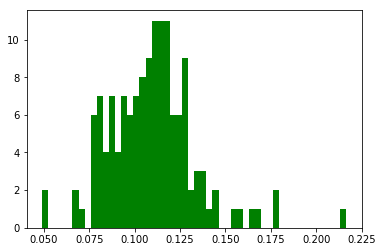

In [331]:
hist_eficiencia = plt.hist(df_eficiencia_geral['id_event'], facecolor="green", bins = 50)


Text(0,0.5,'Frequência')

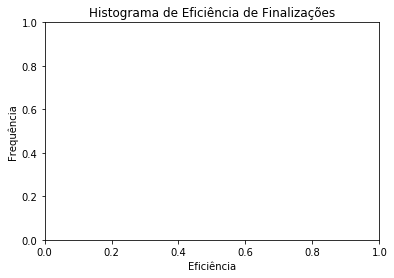

In [332]:
plt.title("Histograma de Eficiência de Finalizações")
plt.xlabel('Eficiência')
plt.ylabel('Frequência')

In [333]:
plt.show()

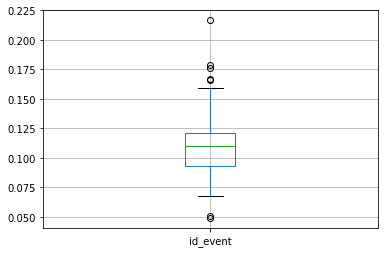

In [334]:
df_eficiencia_geral.boxplot(column='id_event')

In [335]:
dfe = eficiencia_geral.to_frame()

#### Time com maior eficiência

In [336]:
dfe[(dfe['id_event'] == dfe['id_event'].max() )]


,id_event
event_team,
Barcelona,0.216616


#### Time com menor eficiência

In [337]:
dfe[(dfe['id_event'] == dfe['id_event'].min() )]

,id_event
event_team,
Kaiserslautern,0.048969


##### Percebe-se que um dos prováveis motivos de o Barcelona ser um dos melhores clubes do mundo pode estar diretamente relacionado ao alto índice de precisão em finalizações, acima da média dos demais clubes, sendo visto como outlier, conseguindo marcar 2 gols a cada 10 finalizações, em um quantitativo de 5 temporadas.

# 2.	QUAIS LIGAS TEM OS JOGOS MAIS VIOLENTOS?


In [338]:
falta = 3
df_faltas = df_nova_eventos[(df_nova_eventos['event_type'] == falta)]

#### Criando um DT associativo entre os dataframes

In [421]:
df_associacao = pd.merge(df_nova_eventos, df_dados_partida, how='inner', on=['id_odsp', 'id_odsp'])

In [339]:
##df_ff = df_faltas[(df_faltas['id_odsp'] == 'UFot0hit/')]

In [340]:
df_faltas_union = pd.merge(df_faltas, df_dados_partida, how='inner', on=['id_odsp', 'id_odsp'])

In [359]:
df_faltas_agrupadas = df_faltas_union.groupby(['event_team'])

In [450]:
 #DATAFRAMES DE FALTAS DO CAMPEONATO ALEMÃO
df_faltas_alema_2012 = df_faltas_union[(df_faltas_union['league'] == alema) & 
                                       (df_faltas_union['season'] == 2012)]
df_faltas_alema_2013 = df_faltas_union[(df_faltas_union['league'] == alema) & 
                                       (df_faltas_union['season'] == 2013)]
df_faltas_alema_2014 = df_faltas_union[(df_faltas_union['league'] == alema) & 
                                       (df_faltas_union['season'] == 2014)]
df_faltas_alema_2015 = df_faltas_union[(df_faltas_union['league'] == alema) & 
                                       (df_faltas_union['season'] == 2015)]
df_faltas_alema_2016 = df_faltas_union[(df_faltas_union['league'] == alema) & 
                                       (df_faltas_union['season'] == 2016)]

#DATAFRAMES DE FALTAS DO CAMPEONATO INGLES
df_faltas_inglesa_2012 = df_faltas_union[(df_faltas_union['league'] == inglesa) & 
                                       (df_faltas_union['season'] == 2012)]
df_faltas_inglesa_2013 = df_faltas_union[(df_faltas_union['league'] == inglesa) & 
                                       (df_faltas_union['season'] == 2013)]
df_faltas_inglesa_2014 = df_faltas_union[(df_faltas_union['league'] == inglesa) & 
                                       (df_faltas_union['season'] == 2014)]
df_faltas_inglesa_2015 = df_faltas_union[(df_faltas_union['league'] == inglesa) & 
                                       (df_faltas_union['season'] == 2015)]
df_faltas_inglesa_2016 = df_faltas_union[(df_faltas_union['league'] == inglesa) & 
                                       (df_faltas_union['season'] == 2016)]
    
#DATAFRAMES DE FALTAS DO CAMPEONATO ESPANHOL
df_faltas_espanhola_2012 = df_faltas_union[(df_faltas_union['league'] == espanhola) & 
                                       (df_faltas_union['season'] == 2012)]
df_faltas_espanhola_2013 = df_faltas_union[(df_faltas_union['league'] == espanhola) & 
                                       (df_faltas_union['season'] == 2013)]
df_faltas_espanhola_2014 = df_faltas_union[(df_faltas_union['league'] == espanhola) & 
                                       (df_faltas_union['season'] == 2014)]
df_faltas_espanhola_2015 = df_faltas_union[(df_faltas_union['league'] == espanhola) & 
                                       (df_faltas_union['season'] == 2015)]
df_faltas_espanhola_2016 = df_faltas_union[(df_faltas_union['league'] == espanhola) & 
                                       (df_faltas_union['season'] == 2016)]

#DATAFRAMES DE FALTAS DO CAMPEONATO ITALIANO  
df_faltas_italiana_2012 = df_faltas_union[(df_faltas_union['league'] == italiana) & 
                                       (df_faltas_union['season'] == 2012)]
df_faltas_italiana_2013 = df_faltas_union[(df_faltas_union['league'] == italiana) & 
                                       (df_faltas_union['season'] == 2013)]
df_faltas_italiana_2014 = df_faltas_union[(df_faltas_union['league'] == italiana) & 
                                       (df_faltas_union['season'] == 2014)]
df_faltas_italiana_2015 = df_faltas_union[(df_faltas_union['league'] == italiana) & 
                                       (df_faltas_union['season'] == 2015)]
df_faltas_italiana_2016 = df_faltas_union[(df_faltas_union['league'] == italiana) & 
                                       (df_faltas_union['season'] == 2016)]
    
#DATAFRAMES DE FALTAS DO CAMPEONATO FRANCES
df_faltas_francesa_2012 = df_faltas_union[(df_faltas_union['league'] == francesa) & 
                                       (df_faltas_union['season'] == 2012)]
df_faltas_francesa_2013 = df_faltas_union[(df_faltas_union['league'] == francesa) & 
                                       (df_faltas_union['season'] == 2013)]
df_faltas_francesa_2014 = df_faltas_union[(df_faltas_union['league'] == francesa) & 
                                       (df_faltas_union['season'] == 2014)]
df_faltas_francesa_2015 = df_faltas_union[(df_faltas_union['league'] == francesa) & 
                                       (df_faltas_union['season'] == 2015)]
df_faltas_francesa_2016 = df_faltas_union[(df_faltas_union['league'] == francesa) & 
                                       (df_faltas_union['season'] == 2016)]

#### Contando as partidas do campeonato alemão

In [446]:
df_partidas_alema_2012 = df_associacao[(df_associacao['league'] == alema) & (df_associacao['season'] == 2012)]
df_partidas_alema_2013 = df_associacao[(df_associacao['league'] == alema) & (df_associacao['season'] == 2013)]
df_partidas_alema_2014 = df_associacao[(df_associacao['league'] == alema) & (df_associacao['season'] == 2014)]
df_partidas_alema_2015 = df_associacao[(df_associacao['league'] == alema) & (df_associacao['season'] == 2015)]
df_partidas_alema_2016 = df_associacao[(df_associacao['league'] == alema) & (df_associacao['season'] == 2016)]

alema_league_2012 = df_partidas_alema_2012['id_odsp'].count()
alema_league_2013 = df_partidas_alema_2012['id_odsp'].count()
alema_league_2014 = df_partidas_alema_2012['id_odsp'].count()
alema_league_2015 = df_partidas_alema_2012['id_odsp'].count()
alema_league_2016 = df_partidas_alema_2012['id_odsp'].count()


#### Contando as partidas do campeonato Inglês

In [438]:
df_partidas_inglesa_2012 = df_associacao[(df_associacao['league'] == inglesa) & (df_associacao['season'] == 2012)]
df_partidas_inglesa_2013 = df_associacao[(df_associacao['league'] == inglesa) & (df_associacao['season'] == 2013)]
df_partidas_inglesa_2014 = df_associacao[(df_associacao['league'] == inglesa) & (df_associacao['season'] == 2014)]
df_partidas_inglesa_2015 = df_associacao[(df_associacao['league'] == inglesa) & (df_associacao['season'] == 2015)]
df_partidas_inglesa_2016 = df_associacao[(df_associacao['league'] == inglesa) & (df_associacao['season'] == 2016)]

inglesa_league_2012 = df_partidas_inglesa_2012['id_odsp'].count()
inglesa_league_2013 = df_partidas_inglesa_2012['id_odsp'].count()
inglesa_league_2014 = df_partidas_inglesa_2012['id_odsp'].count()
inglesa_league_2015 = df_partidas_inglesa_2012['id_odsp'].count()
inglesa_league_2016 = df_partidas_inglesa_2012['id_odsp'].count()

#### Contando as partidas do campeonato Espanhol

In [439]:
df_partidas_espanhola_2012 = df_associacao[(df_associacao['league'] == espanhola) & (df_associacao['season'] == 2012)]
df_partidas_espanhola_2013 = df_associacao[(df_associacao['league'] == espanhola) & (df_associacao['season'] == 2013)]
df_partidas_espanhola_2014 = df_associacao[(df_associacao['league'] == espanhola) & (df_associacao['season'] == 2014)]
df_partidas_espanhola_2015 = df_associacao[(df_associacao['league'] == espanhola) & (df_associacao['season'] == 2015)]
df_partidas_espanhola_2016 = df_associacao[(df_associacao['league'] == espanhola) & (df_associacao['season'] == 2016)]

espanhola_league_2012 = df_partidas_espanhola_2012['id_odsp'].count()
espanhola_league_2013 = df_partidas_espanhola_2012['id_odsp'].count()
espanhola_league_2014 = df_partidas_espanhola_2012['id_odsp'].count()
espanhola_league_2015 = df_partidas_espanhola_2012['id_odsp'].count()
espanhola_league_2016 = df_partidas_espanhola_2012['id_odsp'].count()

#### Contando partidas do campeonato Italiano

In [442]:
df_partidas_italiana_2012 = df_associacao[(df_associacao['league'] == italiana) & (df_associacao['season'] == 2012)]
df_partidas_italiana_2013 = df_associacao[(df_associacao['league'] == italiana) & (df_associacao['season'] == 2013)]
df_partidas_italiana_2014 = df_associacao[(df_associacao['league'] == italiana) & (df_associacao['season'] == 2014)]
df_partidas_italiana_2015 = df_associacao[(df_associacao['league'] == italiana) & (df_associacao['season'] == 2015)]
df_partidas_italiana_2016 = df_associacao[(df_associacao['league'] == italiana) & (df_associacao['season'] == 2016)]

italiana_league_2012 = df_partidas_italiana_2012['id_odsp'].count()
italiana_league_2013 = df_partidas_italiana_2012['id_odsp'].count()
italiana_league_2014 = df_partidas_italiana_2012['id_odsp'].count()
italiana_league_2015 = df_partidas_italiana_2012['id_odsp'].count()
italiana_league_2016 = df_partidas_italiana_2012['id_odsp'].count()

#### Contando partidas do campeonato Frances

In [441]:
df_partidas_francesa_2012 = df_associacao[(df_associacao['league'] == francesa) & (df_associacao['season'] == 2012)]
df_partidas_francesa_2013 = df_associacao[(df_associacao['league'] == francesa) & (df_associacao['season'] == 2013)]
df_partidas_francesa_2014 = df_associacao[(df_associacao['league'] == francesa) & (df_associacao['season'] == 2014)]
df_partidas_francesa_2015 = df_associacao[(df_associacao['league'] == francesa) & (df_associacao['season'] == 2015)]
df_partidas_francesa_2016 = df_associacao[(df_associacao['league'] == francesa) & (df_associacao['season'] == 2016)]

francesa_league_2012 = df_partidas_francesa_2012['id_odsp'].count()
francesa_league_2013 = df_partidas_francesa_2012['id_odsp'].count()
francesa_league_2014 = df_partidas_francesa_2012['id_odsp'].count()
francesa_league_2015 = df_partidas_francesa_2012['id_odsp'].count()
francesa_league_2016 = df_partidas_francesa_2012['id_odsp'].count()

In [459]:
indice_francesa_2012 = df_faltas_alema_2012['id_odsp'].count()/alema_league_2012
indice_francesa_2013 = df_faltas_alema_2013['id_odsp'].count()/alema_league_2013
indice_francesa_2014 = df_faltas_alema_2014['id_odsp'].count()/alema_league_2014
indice_francesa_2015 = df_faltas_alema_2015['id_odsp'].count()/alema_league_2015
indice_francesa_2016 = df_faltas_alema_2016['id_odsp'].count()/alema_league_2016

indice frances = []

In [460]:
indice_francesa_2016

0.246851308388359

# 3.	QUAL A TEMPORADA MAIS VIOLENTA DE CADA LIGA?



# 4.	QUAL JOGADOR MAIS COMETEU FALTAS DE TODAS AS TEMPORADAS E DE TODAS AS LIGAS?

# 5.	ENTRE OS JOGADORES MAIS FALTOSOS DO CAMPEONATO INGLÊS, ITALIANO E O ESPANHOL, QUAL TEM O MELHOR DESEMPENHO?

# 6.	QUAL O PERCENTUAL DE ACERTOS DE ESCANTEIOS POR LIGA?

# 7.	QUAL O PERCENTUAL DE APROVEITAMENTO DOS JOGOS EM CASA ENTRE BARCELONA E REAL MADRID?

# 8.	QUEM TEVE O MELHOR DESEMPENHO ENTRE 2012 E 2016, C. RONALDO OU MESSI?

# 9.	QUAL A FREQUÊNCIA DE CHUTES DE LONGA DISTÂNCIA DAS PARTIDAS DA LIGA ESPANHOLA?

# 10.	QUAL A PERCENTAGEM DE ACERTOS DE PÊNALTIS DO CAMPEONATO INGLÊS?

In [352]:
df_penaltis = df_nova_eventos[(df_nova_eventos['event_type'] == penalti_concedido) & 
                              (df_nova_eventos['is_goal'] == 0) ]

In [355]:
#df_penaltis_union = pd.merge(df_penaltis, df_dados_partida, how='inner', on=['id_odsp', 'id_odsp'])
#df_penaltis_convertidos = df_penaltis_union[(df_penaltis_union['is_goal'] == gol_true)]
#df_penaltis.loc[(df_penaltis['is_goal'] == 1)]

In [356]:
df_nova_eventos.columns

Index(['id_odsp', 'id_event', 'sort_order', 'text', 'event_type',
       'event_type2', 'side', 'event_team', 'opponent', 'player', 'player2',
       'shot_place', 'shot_outcome', 'is_goal', 'location', 'bodypart',
       'assist_method', 'situation'],
      dtype='object')